# Support Vector Regression (SVR)

## Intuition
Remember: Simple linear regresseion fits with a line via OLS. Minimizes distance between the data value and the average. SUM(y - y_hat)^2->min

In SVR, instead of a simple line, we have a tube. Has a vertical width of epsilon. Called the Epsilon-insensitive tube.

For any points inside the tube, we don't care about the error.

SVR gives a little bit of a "buffer" to our model. 

In SVR, the error of the points outside the tube DOES matter. The error is measured as the vertical distance to the tube. For points above, this error is x_i. For points below, it's x_i^*. 
- called slack variables

We are minimizing

0.5*||w||^2 + C*(Sum_i=1^m(xi_i + xi_i^2)) 
    i.e. sum of distances of points outside the tube are minimized.

Called SVR because each point is a vector. Ones outside the tube are the "support" vectors, because they "support" the structure of the tube.

https://core.ac.uk/download/pdf/81523322.pdf

## Nonlinear SVR

The model we discuss here is linear. There are nonlinear models, that will come up later. HOWEVER, THE MODEL IMPLEMENTED BELOW IS ACTUALLY NONLINEAR.

Nonlinear SVR uses a kernel.

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

As in the previous section, we are not splitting into test set and training set, because the data is so small.

In [3]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [4]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [5]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [12]:
# Need to reshape y to be in a 2D array so that it can be consumed by StandardScaler class.
y = y.reshape((-1, 1)) # Thing in the parens is the shape along each axis. Here, the -1 means the number of rows is inferred from the length of the array, and the remaining dimensions. 1 means we want a single column. Could have also used len(y) in the first index of the tuple

In [14]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

We have to apply Feature Scaling, because there are not coefficients multiplying the features. Remember that in linear regression, the coefficients can compensate for the different scales of features. We don't have that. The equation for SVR is implicit. A good rule of thumb is that if we don't have an explicit equation, we need to scale features

Note that here, we have to also apply feature scaling to salary as well. Because we have an implicit equation. The salary is way higher than the feature, so we need to scale so that the level is not neglected, because salary is so much larger.

Dependent varible needs to be un-scaled at the end so that we get the correct predicted values.

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# WE DO NOT USE THE SAME SCALER OBJECT ON BOTH THE DEPENDENT VARIABLE AND INDEPENDENT VARIABLE
# StandardScaler uses mean/sigma to scale. These are obviously very different in both datasets
# Standard scaler removes the mean and scales to unit variance. So, different kinds of features will need different scalers to get everything in the proper, normalized range

scY = StandardScaler()
y = scY.fit_transform(y)

In [16]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [17]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [18]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') # need to specify a kernel. rbf = radial basis function
regressor.fit(X, y) 



C:\Users\jnaum\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

## Predicting a new result

In [24]:
observation = [[6.5]]
scaledObs = sc.transform(observation)
scaledPrediction = regressor.predict(scaledObs)
unscalePred = scY.inverse_transform(scaledPrediction)

print(unscalePred)

[170370.0204065]


## Visualising the SVR results

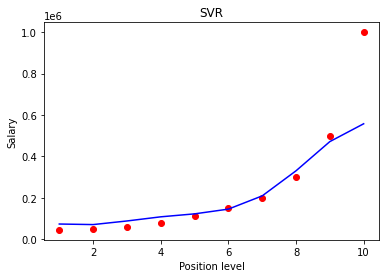

In [27]:
xPlt = sc.inverse_transform(X)
yPlt = scY.inverse_transform(y)

yPltPred = regressor.predict(X)
yPltPred = scY.inverse_transform(yPltPred)

plt.scatter(xPlt, yPlt, color = 'red')
plt.plot(xPlt, yPltPred, color = 'blue')
plt.title('SVR')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


## Visualising the SVR results (for higher resolution and smoother curve)

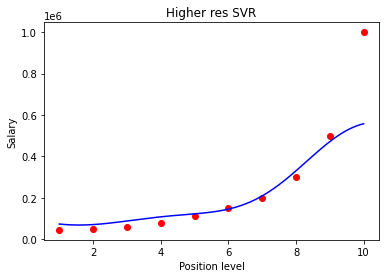

In [28]:
xPltMany = np.arange(min(X), max(X), 0.001)
xPltMany = xPltMany.reshape((-1, 1)) # need 2D array

yPltMany = regressor.predict(xPltMany)

xPltMany = sc.inverse_transform(xPltMany)
yPltMany = scY.inverse_transform(yPltMany)

plt.scatter(xPlt, yPlt, color = 'red')
plt.plot(xPltMany, yPltMany, color = 'blue')
plt.title("Higher res SVR")
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()